In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from heapq import heappush, heappop
%matplotlib inline

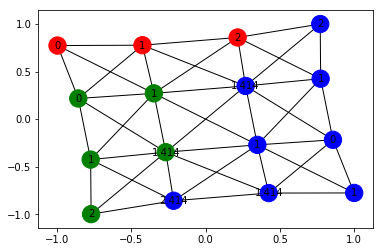

In [57]:
G = nx.grid_2d_graph(4,4)
# add diagonals
G.add_edge((0,0),(1,1))
G.add_edge((1,0),(0,1))
G.add_edge((1,0),(2,1))
G.add_edge((0,1),(1,2))
G.add_edge((1,1),(2,2))
G.add_edge((1,1),(0,2))
G.add_edge((1,1),(2,0))
G.add_edge((1,2),(2,1))
G.add_edge((1,2),(2,3))
G.add_edge((1,2),(0,3))
G.add_edge((2,1),(3,2))
G.add_edge((2,1),(3,0))
G.add_edge((2,2),(3,3))
G.add_edge((2,2),(3,1))
G.add_edge((2,2),(1,3))
G.add_edge((0,2),(1,3))
G.add_edge((2,0),(3,1))
G.add_edge((2,3),(3,2))

# layout nodes
pos = nx.spring_layout(G, iterations=100)

to_visit = []

# initialize nodes
for node in G.nodes():
    d = G.node[node]
    d['distance'] = 999
    d['spotted'] = False

def add_start(team, pos):
    """set starting position for a color"""
    G.node[pos]['spotted'] = True
    G.node[pos]['team'] = team
    G.node[pos]['distance'] = 0
    to_visit.append(pos)

add_start('red', (0,0))
add_start('blue',(2,3))
add_start('green',(1,0))


while len(to_visit)>1:
    curr_node = to_visit[0]
    to_visit = to_visit[1:]
    
    # get all neighbors that haven't been spotted yet
    to_visit += [x for x in G.neighbors(curr_node) if not G.node[x]['spotted']]
    
    for spot in G.neighbors(curr_node):
        # check for shortest path
        G.node[spot]['spotted'] = True
        if (spot[0] != curr_node[0]) and (spot[1] != curr_node[1]):
            ddist = 2**(1/2)
        else:
            ddist = 1
        dist = G.node[curr_node]['distance'] + ddist
        if G.node[spot]['distance'] > dist:
            G.node[spot]['distance'] = dist
            G.node[spot]['team'] = G.node[curr_node]['team']

labels = {k:str(G.node[k]['distance'])[:5] for k in G.nodes()}
colors = [G.node[x]['team'] for x in G.nodes]
nx.draw_networkx(G, pos, font_size=10, node_color=colors, with_labels=True, labels=labels)